In [1]:
import os
import pandas as pd

os.chdir(r'C:\Users\M K SAHU\anaconda3\Scripts')

# Load the data from CSV
google_ads_data = pd.read_csv('google_ads.csv')
listing_site_data = pd.read_csv('listing_ads.csv')


In [2]:
combined_data = pd.concat([google_ads_data, listing_site_data], ignore_index=True)

In [3]:
print(google_ads_data.columns)
print(listing_site_data.columns)


Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country'],
      dtype='object')
Index(['Product Name', 'Categories', 'Date of Report', 'Average Position',
       'Clicks', 'Leads', 'Money Spent ($)', 'Channel', 'Location',
       'Prospects', 'Paid', 'Paid Date'],
      dtype='object')


In [4]:
combined_data = pd.concat([google_ads_data, listing_site_data], ignore_index=True)


In [5]:
combined_data = pd.merge(google_ads_data, listing_site_data, left_on='Campaign', right_on='Product Name', how='inner')


In [6]:
combined_data = pd.concat([google_ads_data[['Week', 'Campaign', 'Clicks', 'Impressions', 'Search Keyword','Cost ($)']],
                           listing_site_data[['Date of Report', 'Product Name', 'Leads','Channel', 'Location','Money Spent ($)']]],
                          axis=1)


In [7]:
#all the common stuff is removed

In [8]:
print(combined_data.columns)

Index(['Week', 'Campaign', 'Clicks', 'Impressions', 'Search Keyword',
       'Cost ($)', 'Date of Report', 'Product Name', 'Leads', 'Channel',
       'Location', 'Money Spent ($)'],
      dtype='object')


In [19]:
print(combined_data)

           Week                  Campaign  Clicks  Impressions  \
0     25/Jan/21       EK_Generic_Swimming     2.0         17.0   
1     25/Jan/21       EK_Generic_Swimming     1.0         13.0   
2     25/Jan/21  EK_Generic_Quad-Tok_Yoga     4.0        154.0   
3     25/Jan/21       EK_Generic_Swimming     2.0          8.0   
4     25/Jan/21    EK_Generic_Swimming_UK     2.0         13.0   
...         ...                       ...     ...          ...   
2086        NaN                       NaN     NaN          NaN   
2087        NaN                       NaN     NaN          NaN   
2088        NaN                       NaN     NaN          NaN   
2089        NaN                       NaN     NaN          NaN   
2090        NaN                       NaN     NaN          NaN   

                    Search Keyword  Cost ($) Date of Report Product Name  \
0          pool reservation system     38.33     2020-10-20       Omnify   
1                 pool booking app     11.70     2020-1

In [20]:
combined_data.to_csv('combined_data.csv', index=False)

In [9]:
combined_data['Date of Report'] = pd.to_datetime(combined_data['Date of Report'])
weekly_report = combined_data.resample('W', on='Date of Report').sum()
monthly_report = combined_data.resample('M', on='Date of Report').sum()

In [10]:
import matplotlib.pyplot as plt

In [11]:
channel_profitability = combined_data.groupby('Channel')['Money Spent ($)'].mean()
most_profitable_channel = channel_profitability.idxmax()

In [12]:
category_keyword_profitability = combined_data.groupby(['Clicks', 'Search Keyword'])['Impressions'].mean()
most_profitable_category_keyword = category_keyword_profitability.idxmax()

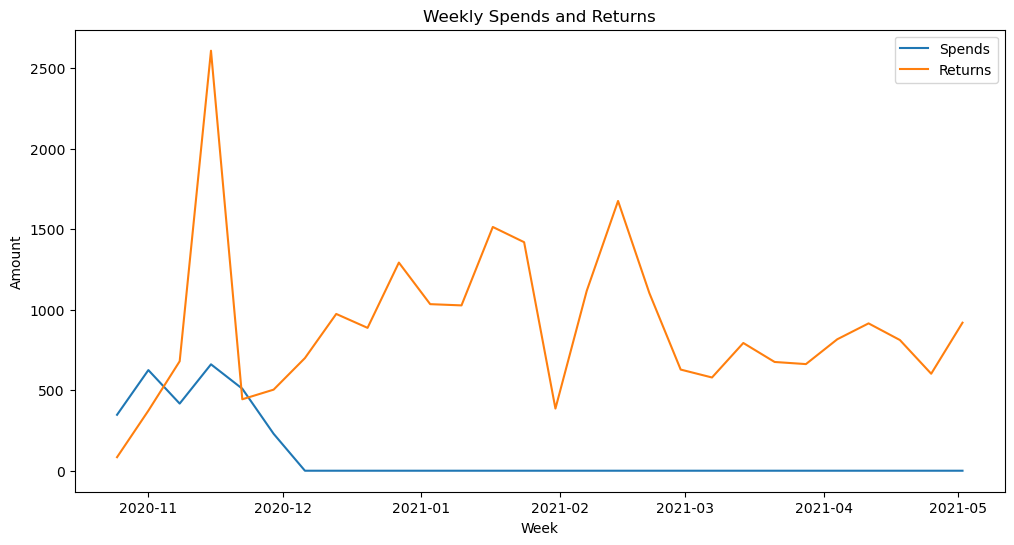

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_report.index, weekly_report['Cost ($)'], label='Spends')
plt.plot(weekly_report.index, weekly_report['Money Spent ($)'], label='Returns')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.title('Weekly Spends and Returns')
plt.show()

In [14]:
geography_impact = combined_data.groupby('Location')['Cost ($)', 'Money Spent ($)'].sum()

In [15]:
print("Most Profitable Channel:", most_profitable_channel)

Most Profitable Channel: Capterra


In [21]:
print("Profitable keyword", most_profitable_category_keyword)

Profitable keyword (10.0, 'yoga studio booking software')


In [17]:
print("Impact Of Geography: ", geography_impact)

Impact:                  Cost ($)  Money Spent ($)
Location                                 
AUSTRALIA         306.16          1192.75
Australia           0.00            31.50
CANADA            297.70          1277.50
Canada              0.00            92.25
Middle East         0.00             0.00
SINGAPORE         382.59          2100.75
Singapore           0.00           142.50
UK                  0.00            10.75
UNITED KINGDOM    383.81          4177.85
UNITED STATES    1418.42         14587.15
US                  0.00            11.25
USA                 0.00            77.75
United Kingdom      0.00           173.25
United States       0.00          1348.00


In [18]:
print(combined_data)

           Week                  Campaign  Clicks  Impressions  \
0     25/Jan/21       EK_Generic_Swimming     2.0         17.0   
1     25/Jan/21       EK_Generic_Swimming     1.0         13.0   
2     25/Jan/21  EK_Generic_Quad-Tok_Yoga     4.0        154.0   
3     25/Jan/21       EK_Generic_Swimming     2.0          8.0   
4     25/Jan/21    EK_Generic_Swimming_UK     2.0         13.0   
...         ...                       ...     ...          ...   
2086        NaN                       NaN     NaN          NaN   
2087        NaN                       NaN     NaN          NaN   
2088        NaN                       NaN     NaN          NaN   
2089        NaN                       NaN     NaN          NaN   
2090        NaN                       NaN     NaN          NaN   

                    Search Keyword  Cost ($) Date of Report Product Name  \
0          pool reservation system     38.33     2020-10-20       Omnify   
1                 pool booking app     11.70     2020-1